In [1]:
def stack_bar(x_m,y_m,x_h,y_h,name):
    trace1 = go.Bar(
        x=x_m,
        y=y_m,
        name='F',
        text=y_m,
        textposition = 'auto'
    )
    trace2 = go.Bar(
        x=x_h,
        y=y_h,
        name='M',
        text=y_h,
        textposition = 'auto'
    )

    data = [trace1, trace2]
    layout = go.Layout(title=name,
        barmode='stack',
        width=400*3.18, 
        height=1.3*660,  #960
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='stacked-bar')
#     plotly.offline.plot(fig)
    plotly.offline.plot(fig, filename = '%s.html'%name, auto_open=True)

In [2]:
%reload_ext autoreload
%autoreload 2

import sys
from pathlib import Path 
current_path = Path().resolve()
abs_path = str(current_path.parent)
sys.path.append(abs_path)

RAW_PATH = current_path.parent / 'data' / 'raw'
OUTPUT_PATH = current_path.parent / 'data' / 'output'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly.plotly import iplot
import plotly.graph_objs as go
import plotly.io as pio

# plotly.tools.set_credentials_file(username='d116626', api_key='rCLXowBHHQLJHHzTxSNM')
init_notebook_mode(connected=True)

import numpy as np


import missingno as msno

stats = ['skew', 'mad', 'kurt']


import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))

In [3]:
lnd = pd.read_excel('%s/demographic.xlsx' %RAW_PATH)

In [4]:
df = lnd.copy()

In [5]:
df.selecionado.value_counts(dropna=False)

 1.0    595
 0.0    473
NaN       2
Name: selecionado, dtype: int64

In [6]:
df = df.fillna(0)
len(df)

1070

In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nome,1070,849,SONIA NEVES ROMEU SILVA,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HC,1070,922,3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nascimento,1070,959,22-Aug-1975 (34y),5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idade,1070,NaN,NaN,NaN,38.6037,15.1808,0,26,35,50.75,84
Sexo,1070,2,F,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Aquisição,1070,1036,12May2012-150358,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filename,1070,1070,BRUNO_CAMPOS_03Jan2012-145256_VBM_6min.nii,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1070,602,DESCARTADA,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,1070,42,0,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,1070,15,0,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head(2)

,Nome,HC,Nascimento,Idade,Sexo,Data Aquisição,Filename,,Unnamed: 8,Unnamed: 9,selecionado
0,INGRID FABER DE VASCONCELLOS,11537072,07-Mar-2013 (0y),0,F,07Mar2013-165045,INGRID_FABER_DE_VASCONCELLOS_07Mar2013-165045_...,c0255,0,0,1.0
1,NICOLAS SANTIAGO ROSA DE SOUZA,2017010701,07-Jul-2011 (6y),6,M,07Jan2017-080514,NICOLAS_SANTIAGO_ROSA_DE_SOUZA_07Jan2017-08051...,NAO FAZER,0,0,0.0


In [9]:
df.columns

Index(['Nome', 'HC', 'Nascimento', 'Idade', 'Sexo', 'Data Aquisição',
       'Filename', ' ', 'Unnamed: 8', 'Unnamed: 9', 'selecionado'],
      dtype='object')

In [10]:
df.loc[553, 'selecionado'] = 1.0

In [11]:
bins = [0,9,15,20,30,40,50,60,70,80,90]
labels=['0-9','10-15','16-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']

In [12]:
df['bins'] = pd.cut(df['Idade'], bins=bins, labels=labels, include_lowest=True)

In [13]:
df = df.sort_values(by='bins', ascending=True)

In [16]:
df.to_excel('demographic.xlsx',index=False,encoding='utf-8')

# Total

In [14]:
#total
t = pd.DataFrame(df['bins'].value_counts())
t.sort_index()

,bins
0-9,6
10-15,20
16-20,42
21-30,346
31-40,214
41-50,174
51-60,168
61-70,76
71-80,18
81-90,6


In [15]:
#homem
mask = (df['Sexo']=='M')
h_s = pd.DataFrame(df[mask]['bins'].value_counts())
h_s = h_s.sort_index()
x_h = list(h_s.index) 
y_h = list(h_s['bins'])

In [16]:
#mulher
mask = (df['Sexo']=='F')
m_s = pd.DataFrame(df[mask]['bins'].value_counts())
m_s = m_s.sort_index()
x_m = list(m_s.index) 
y_m = list(m_s['bins'])

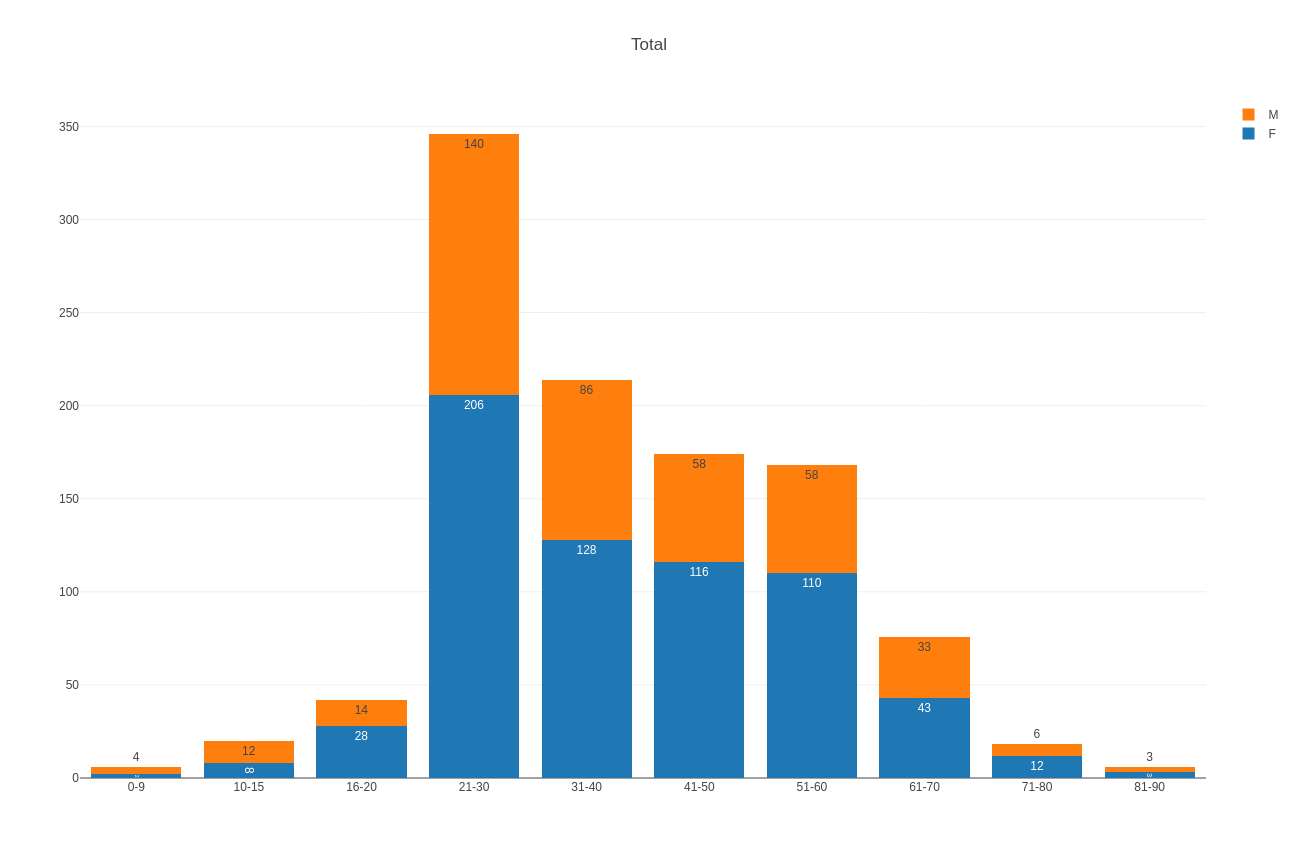

In [17]:
stack_bar(x_m,y_m,x_h,y_h,'Total')

# Não Selecionados.
    Divisão entre H e M

In [18]:
#não selecionado
df[df['selecionado']==0]['bins'].value_counts()

21-30    161
31-40     90
41-50     76
51-60     75
61-70     32
16-20     13
71-80     10
10-15      9
0-9        5
81-90      3
Name: bins, dtype: int64

In [19]:
#homem
mask = (df['selecionado']==0) & (df['Sexo']=='M')
h_s = pd.DataFrame(df[mask]['bins'].value_counts())
h_s = h_s.sort_index()
x_h = list(h_s.index) 
y_h = list(h_s['bins'])

In [20]:
#mulher
mask = (df['selecionado']==0) & (df['Sexo']=='F')
m_s = pd.DataFrame(df[mask]['bins'].value_counts())
m_s = m_s.sort_index()
x_m = list(m_s.index) 
y_m = list(m_s['bins'])

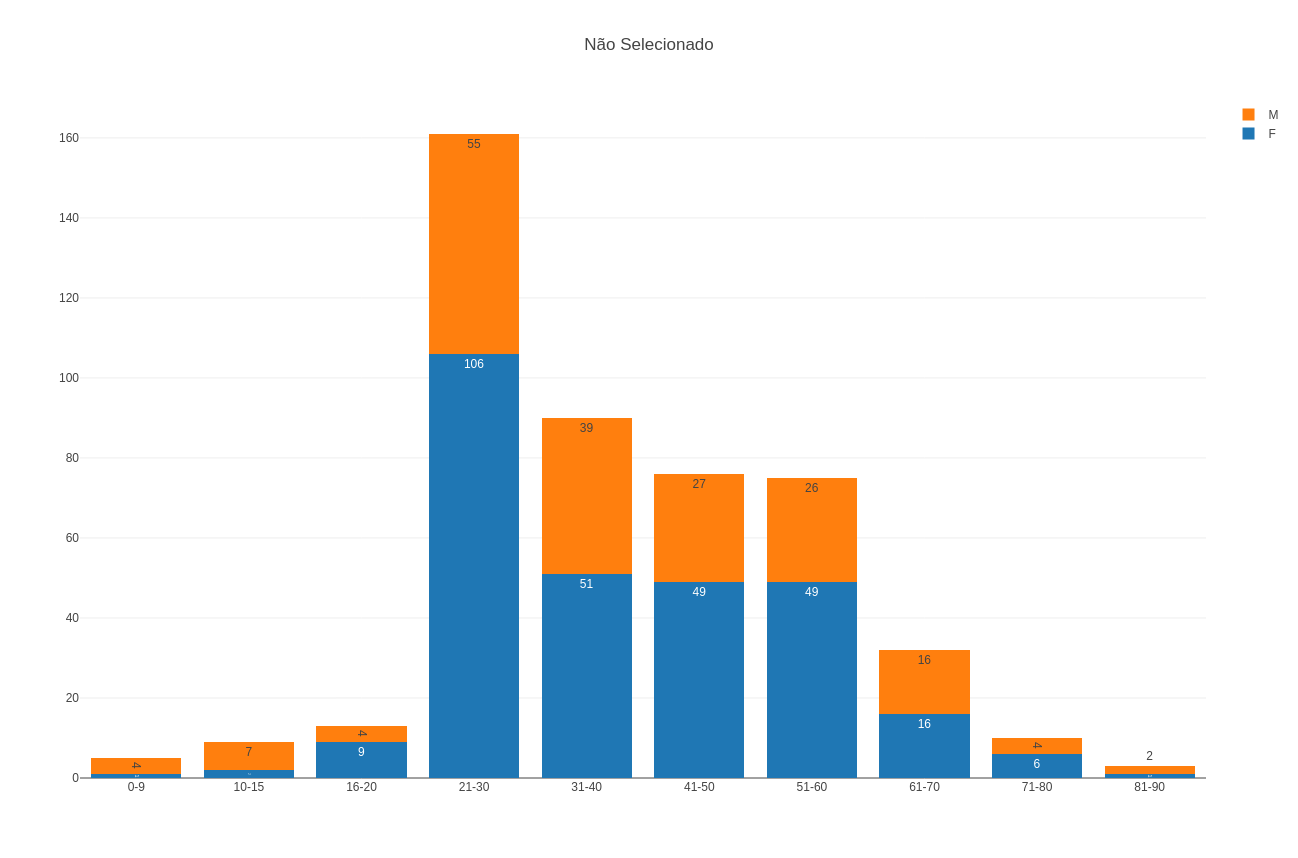

In [21]:
stack_bar(x_m,y_m,x_h,y_h,'Não Selecionado')

# Selecionados

In [22]:
#selecionado
df[df['selecionado']==1]['bins'].value_counts()

21-30    185
31-40    124
41-50     98
51-60     93
61-70     44
16-20     29
10-15     11
71-80      8
81-90      3
0-9        1
Name: bins, dtype: int64

In [23]:
#homem
mask = (df['selecionado']==1) & (df['Sexo']=='M')
h_s = pd.DataFrame(df[mask]['bins'].value_counts())
h_s = h_s.sort_index()
x_h = list(h_s.index) 
y_h = list(h_s['bins'])

In [24]:
#mulher
mask = (df['selecionado']==1) & (df['Sexo']=='F')
m_s = pd.DataFrame(df[mask]['bins'].value_counts())
m_s = m_s.sort_index()
x_m = list(m_s.index) 
y_m = list(m_s['bins'])

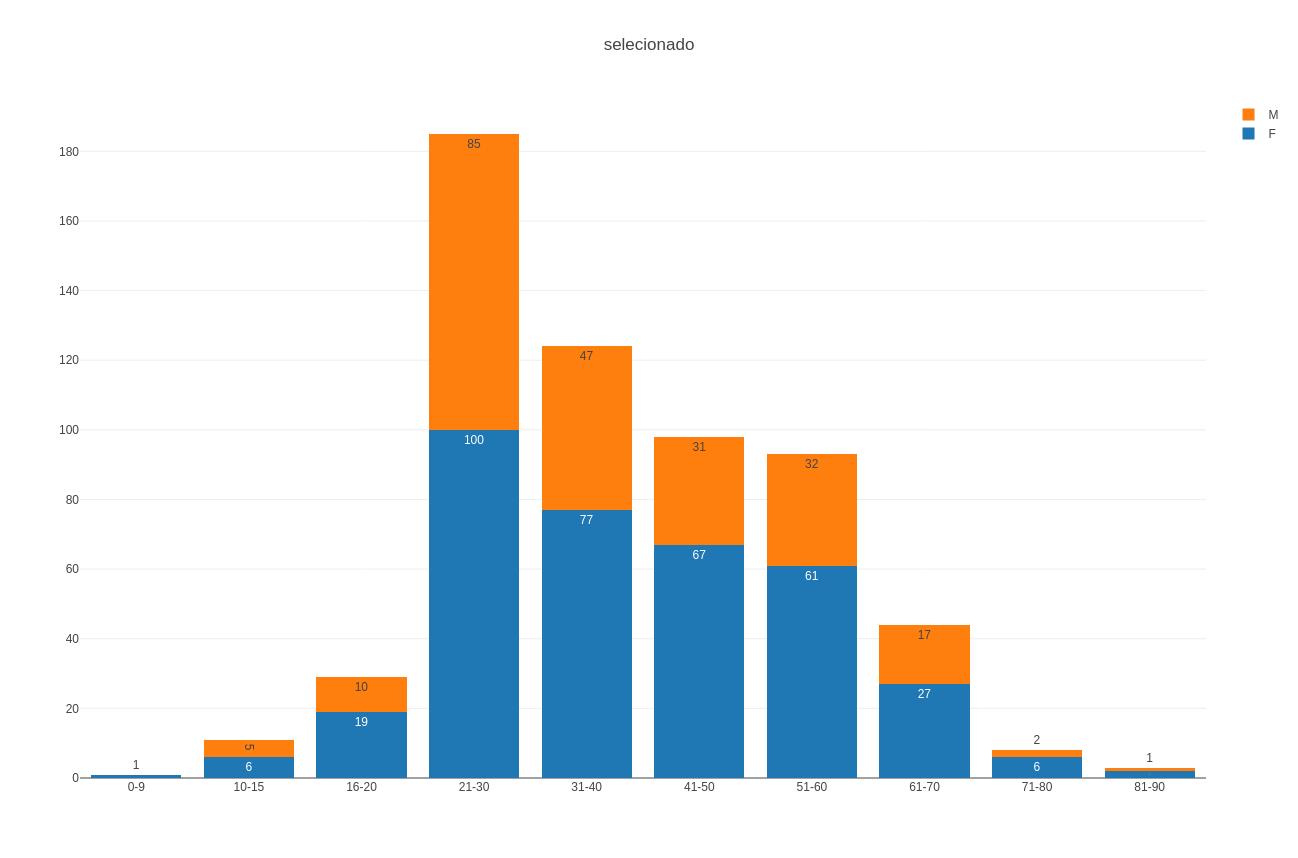

In [25]:
stack_bar(x_m,y_m,x_h,y_h,'selecionado')

In [26]:
#homem
mask = (df['selecionado']==0) & (df['Sexo']=='M')
h_s = pd.DataFrame(df[mask]['bins'].value_counts())
h_s = h_s.sort_index()
n_x_h = list(h_s.index) 
n_y_h = list(h_s['bins'])

In [27]:
#mulher
mask = (df['selecionado']==0) & (df['Sexo']=='F')
m_s = pd.DataFrame(df[mask]['bins'].value_counts())
m_s = m_s.sort_index()
n_x_m = list(m_s.index) 
n_y_m = list(m_s['bins'])

In [28]:
#homem
mask = (df['selecionado']==1) & (df['Sexo']=='M')
h_s = pd.DataFrame(df[mask]['bins'].value_counts())
h_s = h_s.sort_index()
s_x_h = list(h_s.index) 
s_y_h = list(h_s['bins'])

In [29]:
#mulher
mask = (df['selecionado']==1) & (df['Sexo']=='F')
m_s = pd.DataFrame(df[mask]['bins'].value_counts())
m_s = m_s.sort_index()
s_x_m = list(m_s.index) 
s_y_m = list(m_s['bins'])

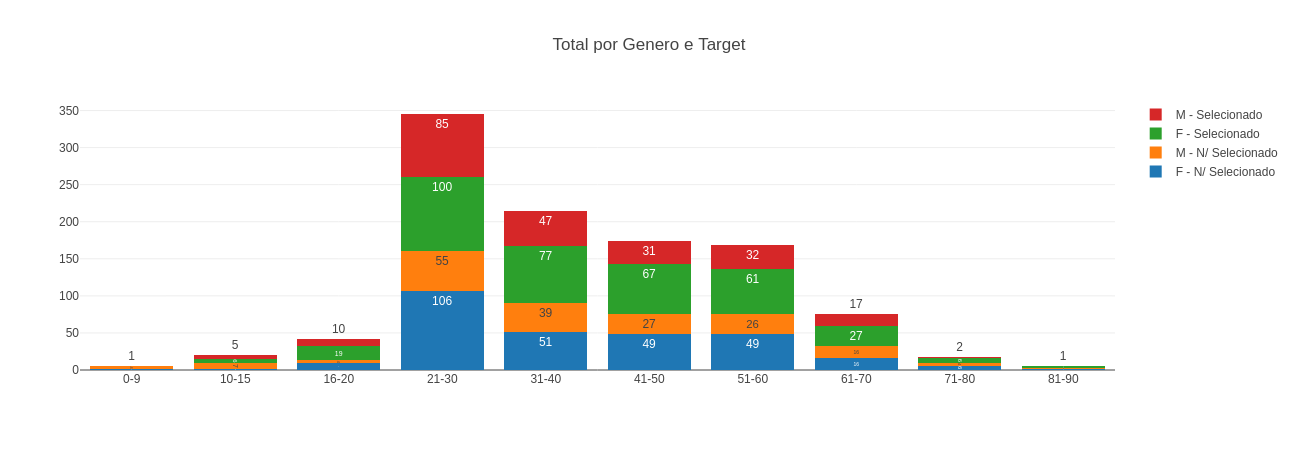

'file:///home/d116626/JupyterLab/lnd/notebooks/Total Genero.html'

In [31]:

trace1 = go.Bar(
    x=n_x_m,
    y=n_y_m,
    name='F - N/ Selecionado',
    text=n_y_m,
    textposition = 'auto'
)
trace2 = go.Bar(
    x=n_x_h,
    y=n_y_h,
    name='M - N/ Selecionado',
    text=n_y_h,
    textposition = 'auto'
)

trace3 = go.Bar(
    x=s_x_m,
    y=s_y_m,
    name='F - Selecionado',
    text=s_y_m,
    textposition = 'auto'
)
trace4 = go.Bar(
    x=s_x_h,
    y=s_y_h,
    name='M - Selecionado',
    text=s_y_h,
    textposition = 'auto'
)



data = [trace1, trace2,trace3,trace4]
layout = go.Layout(title='Total por Genero e Target',
    barmode='stack',
#     width=400*3.18, 
#     height=1.3*660,  #960
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')
#     plotly.offline.plot(fig)
plotly.offline.plot(fig, filename = '%s.html'%'Total Genero', auto_open=True)